## Observations and Insights 

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [128]:
merged.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [129]:
# Checking the number of mice.

len(merged["Mouse ID"].unique())



249

In [130]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#read csv files
drop_duplicate = merged.loc[merged.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
drop_duplicate

array(['g989'], dtype=object)

In [131]:
# Optional: Get all the data for the duplicate mouse ID. 


In [132]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged[merged['Mouse ID'].isin(drop_duplicate) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [133]:
# Checking the number of mice in the clean DataFrame.

clean_df_mice_count = len(clean_df["Mouse ID"].unique())
clean_df_mice_count

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean,
                           "Median": median, 
                           "Variance": variance, 
                           "Standard Deviation":
                           Std, "SEM": sem})
summary_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [135]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line




## Bar and Pie Charts

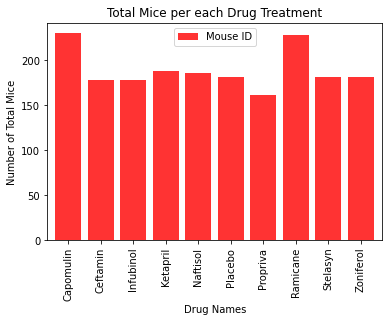

<Figure size 432x288 with 0 Axes>

In [136]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugname_group = pd.DataFrame(merged.groupby(["Drug Regimen"]).count()).reset_index()
drugname_mouse = drugname_group[["Drug Regimen", "Mouse ID"]]
drugname_mouse = drugname_mouse.set_index("Drug Regimen")

drugname_mouse.plot(kind="bar", color = "red", alpha=0.8, align="center", width=.8)

plt.title("Total Mice per each Drug Treatment")
plt.xlabel("Drug Names")
plt.ylabel("Number of Total Mice")

plt.show()
plt.tight_layout()

#saving the image file 
plt.savefig("../Images/pandas_bar.png")


Text(0, 0.5, 'Number of Total Mice')

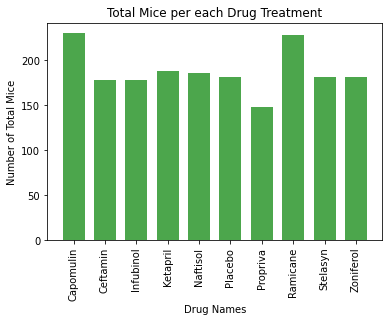

In [149]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse_count = (clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mouse_count

x_axis = np.arange(len(summary_df))
x_axis


plt.bar(x_axis, mouse_count, color = "green", alpha=0.7, align="center", width=.7)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])
plt.xticks(rotation="vertical")

#labeling the axis of the bar Graph
plt.title("Total Mice per each Drug Treatment")
plt.xlabel("Drug Names")
plt.ylabel("Number of Total Mice")




Sex
Female    123
Male      125
Name: Total Count, dtype: int64


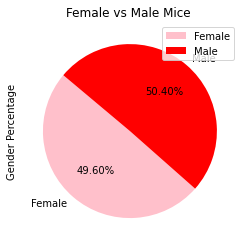

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# first grouping the mice accourding to their gender
Gender_grouped_mice = clean_df.groupby(["Mouse ID","Sex"])
Gender_grouped_mice.head()


mice_gender_df = pd.DataFrame(Gender_grouped_mice.size())
mice_gender_df.head()

# Creating Data frame using the gender group to count each gender
mouse_gender = pd.DataFrame(mice_gender_df.groupby(["Sex"]).count())
mouse_gender
mouse_gender.columns = ["Total Count"]

total_count = mouse_gender["Total Count"]
print(total_count)
gender_sum = mouse_gender["Total Count"].sum()
gender_sum

mouse_gender["Gender Percentage"] = (total_count/gender_sum)*100

plot = mouse_gender.plot.pie(y='Gender Percentage', title= 'Female vs Male Mice ', colors = ['Pink', 'red'], startangle=140, shadow = False, autopct="%1.2f%%")

plt.savefig("../Images/pandas_pie.png")



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
